#P4J library must be compiled and installed
#mexican hatt too

-march=x86-64
python setup.py build_ext --inplace
pip install .

In [26]:
import sys
import os  


print(sys.path)
from features.tests.test_create_astro_objects import test_check_input


['/home/mdelafuente/batch_processing', '/home/mdelafuente/miniconda3/envs/dataset/lib/python310.zip', '/home/mdelafuente/miniconda3/envs/dataset/lib/python3.10', '/home/mdelafuente/miniconda3/envs/dataset/lib/python3.10/lib-dynload', '', '/home/mdelafuente/miniconda3/envs/dataset/lib/python3.10/site-packages', '/home/mdelafuente/miniconda3/envs/dataset/lib/python3.10/site-packages/setuptools/_vendor']


In [27]:

from pipeline.lc_classifier.lc_classifier.features.composites.ztf import ZTFFeatureExtractor  

In [29]:
import glob
import pickle

aos_paths = glob.glob('/home/mdelafuente/batch_processing/aos/*')#[3:]
with open(f'{aos_paths[41500]}', 'rb') as f:
    data = pickle.load(f)

# Now, 'data' contains the loaded object
print(data.features)
display(data.detections)

Empty DataFrame
Columns: [name, value, fid, sid, version]
Index: []


,oid,candid,pid,ra,dec,mjd,brightness,e_brightness,fid,isdiffpos,forced,tid,sid,unit
aid,,,,,,,,,,,,,,
aid_ZTF20abxgyar,ZTF20abxgyar,1377155331515010130,1377155331515,249.928070,15.484315,59131.152333,15.643441,0.089490,g,-1,False,ZTF,ZTF,magnitude
aid_ZTF20abxgyar,ZTF20abxgyar,1478544865615015000,1478544865615,249.928010,15.484171,59232.542122,15.206831,0.009747,g,1,False,ZTF,ZTF,magnitude
aid_ZTF20abxgyar,ZTF20abxgyar,1495529075615015000,1495529075615,249.928012,15.484211,59249.527526,15.210844,0.007253,g,1,False,ZTF,ZTF,magnitude
aid_ZTF20abxgyar,ZTF20abxgyar,1504538205615015000,1504538205615,249.928066,15.484410,59258.537353,15.204651,0.010690,g,1,False,ZTF,ZTF,magnitude
aid_ZTF20abxgyar,ZTF20abxgyar,1543349185615015000,1543349185615,249.927910,15.484521,59297.351346,15.205609,0.013687,g,1,False,ZTF,ZTF,magnitude
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aid_ZTF20abxgyar,ZTF20abxgyar,2706316335615025000,2706316335615,249.928182,15.484382,60460.321014,239.883292,60.861203,g,1,False,ZTF,ZTF,diff_flux
aid_ZTF20abxgyar,ZTF20abxgyar,2710374535615015000,2710374535615,249.928067,15.484307,60464.379193,307.581351,53.680887,g,1,False,ZTF,ZTF,diff_flux
aid_ZTF20abxgyar,ZTF20abxgyar,2721354235615015000,2721354235615,249.928120,15.484359,60475.358709,248.229161,31.462263,g,1,False,ZTF,ZTF,diff_flux


In [30]:
def extract_mag_per_band(detections):
    detections_per_band = []
    for band in data.detections['fid'].unique():
        ith_band = data.detections[data.detections['fid'] == f'{band}'  ]
        ith_band = ith_band[ith_band['unit'] == 'magnitude']
        detections_per_band.append(ith_band)
    assert len(detections_per_band) == data.detections['fid'].unique().shape[0]
    return detections_per_band

In [31]:
def extract_diff_flux_per_band(detections):
    detections_per_band = []
    for band in data.detections['fid'].unique():
        ith_band = data.detections[data.detections['fid'] == f'{band}'  ]
        ith_band = ith_band[ith_band['unit'] == 'diff_flux']
        detections_per_band.append(ith_band)
    assert len(detections_per_band) == data.detections['fid'].unique().shape[0]
    return detections_per_band

In [32]:
det_per_bands = extract_diff_flux_per_band(data.detections)

In [33]:
from typing import List
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

def plot_bands(list_of_band_detections:List):
    fig,ax = plt.subplots(1,1,figsize =(8,5)) 
    colors = ['green','red']
    for ith_band,color in zip(list_of_band_detections,colors):

        plt.errorbar(x = ith_band['mjd'], 
                     y = ith_band['brightness'],
                     yerr = ith_band['e_brightness'], 
                     fmt='o', linewidth=2, capsize=5, c =  color)
    plt.ylabel('Diff_flux')
    plt.xlabel('Modified Julian Dates')
    plt.show()


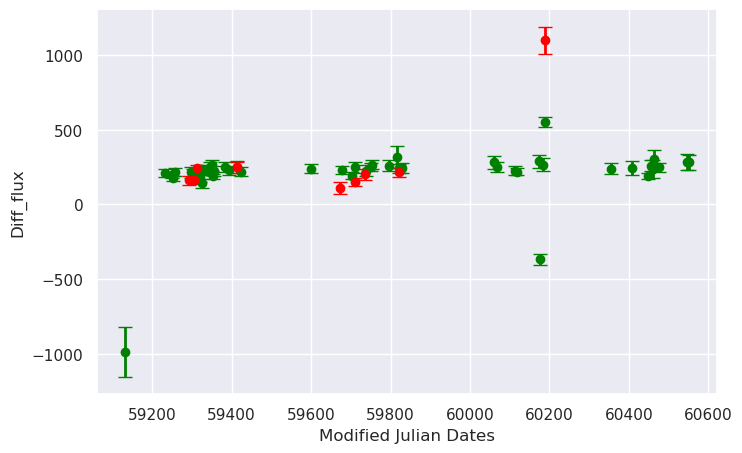

In [34]:
plot_bands(det_per_bands)

In [35]:
from typing import Tuple
import numpy as np

def band_list_to_time_flux_mask_arrays(band_detection_list:List,sequence_lenght: int = 200) -> List:
    flux_bands = []
    time_bands = []
    mask_bands = []
    for band_df in band_detection_list:
        band_df.sort_values(by = 'mjd', inplace = True)
        assert band_df['unit'].unique() == 'diff_flux'

        time = band_df['mjd'].values
        flux = band_df['brightness'].values
         
        if time.shape[0] > 200:
            time = time[:200]
            flux = flux[:200]
            mask = (time > 1).astype(float)

            flux_bands.append(flux)#
            time_bands.append(time)
            mask_bands.append(mask)

            continue
        elif time.shape == 200:
            flux_bands.append(flux)#
            time_bands.append(time)
            mask = (time > 1).astype(float)
            mask_bands.append(mask)

            continue
        else: #padding for ndet < 200 per channel
            time = np.pad(time,(0,sequence_lenght-time.shape[0]),'constant',constant_values = 0)
            flux = np.pad(flux,(0,sequence_lenght-flux.shape[0]),'constant',constant_values = 0)
            mask = (time > 1).astype(float)
            mask_bands.append(mask)
            flux_bands.append(flux)#
            time_bands.append(time)

    
    return np.array(flux_bands).transpose(1,0),np.array(time_bands).transpose(1,0),np.array(mask_bands).transpose(1,0)

In [36]:
flux,time,mask =band_list_to_time_flux_mask_arrays(det_per_bands)

In [37]:
flux.shape

(200, 2)

In [38]:
def create_mask(flux_array):
    mask = (time > 1).astype(float)
    return mask

In [39]:
test_mask = create_mask(flux)

<Axes: >

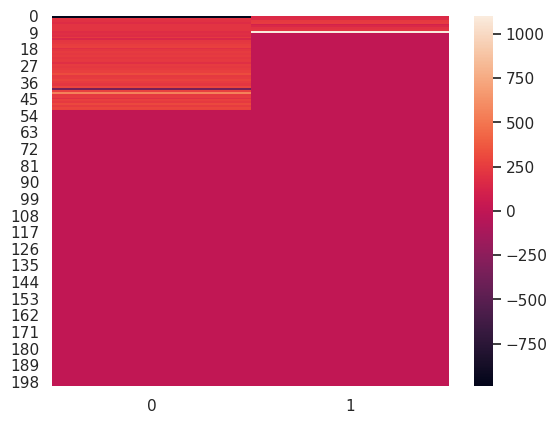

In [40]:
sns.heatmap(flux)

<Axes: >

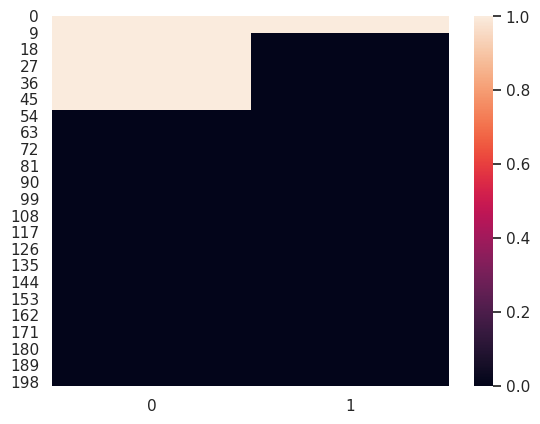

In [41]:
import seaborn as sns
sns.heatmap(test_mask)

In [42]:

ZTF_ff_columns_to_PROD= {
    "g-r_mean_g,r": "g_r_mean_12",
    "g-r_max_g,r": "g_r_max_12",
    "g-r_mean_corr_g,r": "g_r_mean_corr_12",
    "g-r_max_corr_g,r": "g_r_max_corr_12",
    "W1-W2": "W1_W2",
    "W2-W3": "W2_W3",
    "W3-W4": "W3_W4",
    "g-W1": "g_W1",
    "r-W1": "r_W1",
    "g-W2": "g_W2",
    "r-W2": "r_W2",
    "g-W3": "g_W3",
    "r-W3": "r_W3",
    "g-W4": "g_W4",
    "r-W4": "r_W4",
    "MHPS_ratio_g": "MHPS_ratio_1",
    "MHPS_low_g": "MHPS_low_1",
    "MHPS_high_g": "MHPS_high_1",
    "MHPS_non_zero_g": "MHPS_non_zero_1",
    "MHPS_PN_flag_g": "MHPS_PN_flag_1",
    "MHPS_ratio_r": "MHPS_ratio_2",
    "MHPS_low_r": "MHPS_low_2",
    "MHPS_high_r": "MHPS_high_2",
    "MHPS_non_zero_r": "MHPS_non_zero_2",
    "MHPS_PN_flag_r": "MHPS_PN_flag_2",
    "GP_DRW_sigma_g": "GP_DRW_sigma_1",
    "GP_DRW_tau_g": "GP_DRW_tau_1",
    "GP_DRW_sigma_r": "GP_DRW_sigma_2",
    "GP_DRW_tau_r": "GP_DRW_tau_2",
    "Multiband_period_g,r": "Multiband_period_12",
    "PPE_g,r": "PPE_12",
    "Period_band_g": "Period_band_1",
    "delta_period_g": "delta_period_1",
    "Period_band_r": "Period_band_2",
    "delta_period_r": "delta_period_2",
    "Power_rate_1_4_g,r": "Power_rate_1_4_12",
    "Power_rate_1_3_g,r": "Power_rate_1_3_12",
    "Power_rate_1_2_g,r": "Power_rate_1_2_12",
    "Power_rate_2_g,r": "Power_rate_2_12",
    "Power_rate_3_g,r": "Power_rate_3_12",
    "Power_rate_4_g,r": "Power_rate_4_12",
    "Psi_CS_g": "Psi_CS_1",
    "Psi_eta_g": "Psi_eta_1",
    "Psi_CS_r": "Psi_CS_2",
    "Psi_eta_r": "Psi_eta_2",
    "Amplitude_g": "Amplitude_1",
    "AndersonDarling_g": "AndersonDarling_1",
    "Autocor_length_g": "Autocor_length_1",
    "Beyond1Std_g": "Beyond1Std_1",
    "Con_g": "Con_1",
    "Eta_e_g": "Eta_e_1",
    "Gskew_g": "Gskew_1",
    "MaxSlope_g": "MaxSlope_1",
    "Mean_g": "Mean_1",
    "Meanvariance_g": "Meanvariance_1",
    "MedianAbsDev_g": "MedianAbsDev_1",
    "MedianBRP_g": "MedianBRP_1",
    "PairSlopeTrend_g": "PairSlopeTrend_1",
    "PercentAmplitude_g": "PercentAmplitude_1",
    "Q31_g": "Q31_1",
    "Rcs_g": "Rcs_1",
    "Skew_g": "Skew_1",
    "SmallKurtosis_g": "SmallKurtosis_1",
    "Std_g": "Std_1",
    "StetsonK_g": "StetsonK_1",
    "Pvar_g": "Pvar_1",
    "ExcessVar_g": "ExcessVar_1",
    "SF_ML_amplitude_g": "SF_ML_amplitude_1",
    "SF_ML_gamma_g": "SF_ML_gamma_1",
    "IAR_phi_g": "IAR_phi_1",
    "LinearTrend_g": "LinearTrend_1",
    "Amplitude_r": "Amplitude_2",
    "AndersonDarling_r": "AndersonDarling_2",
    "Autocor_length_r": "Autocor_length_2",
    "Beyond1Std_r": "Beyond1Std_2",
    "Con_r": "Con_2",
    "Eta_e_r": "Eta_e_2",
    "Gskew_r": "Gskew_2",
    "MaxSlope_r": "MaxSlope_2",
    "Mean_r": "Mean_2",
    "Meanvariance_r": "Meanvariance_2",
    "MedianAbsDev_r": "MedianAbsDev_2",
    "MedianBRP_r": "MedianBRP_2",
    "PairSlopeTrend_r": "PairSlopeTrend_2",
    "PercentAmplitude_r": "PercentAmplitude_2",
    "Q31_r": "Q31_2",
    "Rcs_r": "Rcs_2",
    "Skew_r": "Skew_2",
    "SmallKurtosis_r": "SmallKurtosis_2",
    "Std_r": "Std_2",
    "StetsonK_r": "StetsonK_2",
    "Pvar_r": "Pvar_2",
    "ExcessVar_r": "ExcessVar_2",
    "SF_ML_amplitude_r": "SF_ML_amplitude_2",
    "SF_ML_gamma_r": "SF_ML_gamma_2",
    "IAR_phi_r": "IAR_phi_2",
    "LinearTrend_r": "LinearTrend_2",
    "sgscore1": "sgscore1",
    "dist_nr": "dist_nr",
    "ps_g-r": "ps_g_r",
    "SPM_A_g": "SPM_A_1",
    "SPM_t0_g": "SPM_t0_1",
    "SPM_gamma_g": "SPM_gamma_1",
    "SPM_beta_g": "SPM_beta_1",
    "SPM_tau_rise_g": "SPM_tau_rise_1",
    "SPM_tau_fall_g": "SPM_tau_fall_1",
    "SPM_A_r": "SPM_A_2",
    "SPM_t0_r": "SPM_t0_2",
    "SPM_gamma_r": "SPM_gamma_2",
    "SPM_beta_r": "SPM_beta_2",
    "SPM_tau_rise_r": "SPM_tau_rise_2",
    "SPM_tau_fall_r": "SPM_tau_fall_2",
    "SPM_chi_g": "SPM_chi_1",
    "SPM_chi_r": "SPM_chi_2",
    "TDE_decay_g": "TDE_decay_1",
    "TDE_decay_chi_g": "TDE_decay_chi_1",
    "TDE_decay_r": "TDE_decay_2",
    "TDE_decay_chi_r": "TDE_decay_chi_2",
    "fleet_a_g": "fleet_a_1",
    "fleet_w_g": "fleet_w_1",
    "fleet_chi_g": "fleet_chi_1",
    "fleet_a_r": "fleet_a_2",
    "fleet_w_r": "fleet_w_2",
    "fleet_chi_r": "fleet_chi_2",
    "color_variation_g,r": "color_variation_12",
    "positive_fraction_g": "positive_fraction_1",
    "n_forced_phot_band_before_g": "n_forced_phot_band_before_1",
    "dbrightness_first_det_band_g": "dbrightness_first_det_band_1",
    "dbrightness_forced_phot_band_g": "dbrightness_forced_phot_band_1",
    "last_brightness_before_band_g": "last_brightness_before_band_1",
    "max_brightness_before_band_g": "max_brightness_before_band_1",
    "median_brightness_before_band_g": "median_brightness_before_band_1",
    "n_forced_phot_band_after_g": "n_forced_phot_band_after_1",
    "max_brightness_after_band_g": "max_brightness_after_band_1",
    "median_brightness_after_band_g": "median_brightness_after_band_1",
    "positive_fraction_r": "positive_fraction_2",
    "n_forced_phot_band_before_r": "n_forced_phot_band_before_2",
    "dbrightness_first_det_band_r": "dbrightness_first_det_band_2",
    "dbrightness_forced_phot_band_r": "dbrightness_forced_phot_band_2",
    "last_brightness_before_band_r": "last_brightness_before_band_2",
    "max_brightness_before_band_r": "max_brightness_before_band_2",
    "median_brightness_before_band_r": "median_brightness_before_band_2",
    "n_forced_phot_band_after_r": "n_forced_phot_band_after_2",
    "max_brightness_after_band_r": "max_brightness_after_band_2",
    "median_brightness_after_band_r": "median_brightness_after_band_2",
    "ulens_u0_g": "ulens_u0_1",
    "ulens_tE_g": "ulens_tE_1",
    "ulens_fs_g": "ulens_fs_1",
    "ulens_chi_g": "ulens_chi_1",
    "ulens_u0_r": "ulens_u0_2",
    "ulens_tE_r": "ulens_tE_2",
    "ulens_fs_r": "ulens_fs_2",
    "ulens_chi_r": "ulens_chi_2",
    "Harmonics_mse_g": "Harmonics_mse_1",
    "Harmonics_chi_g": "Harmonics_chi_1",
    "Harmonics_mag_1_g": "Harmonics_mag_1_1",
    "Harmonics_mag_2_g": "Harmonics_mag_2_1",
    "Harmonics_phase_2_g": "Harmonics_phase_2_1",
    "Harmonics_mag_3_g": "Harmonics_mag_3_1",
    "Harmonics_phase_3_g": "Harmonics_phase_3_1",
    "Harmonics_mag_4_g": "Harmonics_mag_4_1",
    "Harmonics_phase_4_g": "Harmonics_phase_4_1",
    "Harmonics_mag_5_g": "Harmonics_mag_5_1",
    "Harmonics_phase_5_g": "Harmonics_phase_5_1",
    "Harmonics_mag_6_g": "Harmonics_mag_6_1",
    "Harmonics_phase_6_g": "Harmonics_phase_6_1",
    "Harmonics_mag_7_g": "Harmonics_mag_7_1",
    "Harmonics_phase_7_g": "Harmonics_phase_7_1",
    "Harmonics_mse_r": "Harmonics_mse_2",
    "Harmonics_chi_r": "Harmonics_chi_2",
    "Harmonics_mag_1_r": "Harmonics_mag_1_2",
    "Harmonics_mag_2_r": "Harmonics_mag_2_2",
    "Harmonics_phase_2_r": "Harmonics_phase_2_2",
    "Harmonics_mag_3_r": "Harmonics_mag_3_2",
    "Harmonics_phase_3_r": "Harmonics_phase_3_2",
    "Harmonics_mag_4_r": "Harmonics_mag_4_2",
    "Harmonics_phase_4_r": "Harmonics_phase_4_2",
    "Harmonics_mag_5_r": "Harmonics_mag_5_2",
    "Harmonics_phase_5_r": "Harmonics_phase_5_2",
    "Harmonics_mag_6_r": "Harmonics_mag_6_2",
    "Harmonics_phase_6_r": "Harmonics_phase_6_2",
    "Harmonics_mag_7_r": "Harmonics_mag_7_2",
    "Harmonics_phase_7_r": "Harmonics_phase_7_2",
    "Timespan": "Timespan",
    "Coordinate_x": "Coordinate_x",
    "Coordinate_y": "Coordinate_y",
    "Coordinate_z": "Coordinate_z",
}

In [43]:
import yaml
with open("/home/mdelafuente/batch_processing/pipeline/training/lc_classifier_ztf/ATAT_ALeRCE/data/datasets/ZTF_ff/final/LC_MD_FEAT_240627_windows_200_12/dict_info.yaml", 'r') as stream:
    config = yaml.safe_load(stream)

In [44]:
from pipeline.lc_classifier.lc_classifier.features.composites.ztf import ZTFFeatureExtractor
ex = ZTFFeatureExtractor()
ex.compute_features_batch([astro_object])

NameError: name 'astro_object' is not defined

In [ ]:

astro_object.features['fid']= astro_object.features['fid'].fillna('') 


In [ ]:
astro_object.features["name_fid"] = astro_object.features.apply(
    lambda row: f"{row['name']}_{row['fid']}" if row['fid'] != '' else row['name'], axis=1 
)

In [ ]:
astro_object.features['prod']  = astro_object.features['name_fid'].map(ZTF_ff_columns_to_PROD)


In [ ]:
astro_object.features = astro_object.features.dropna(subset = 'prod')

In [ ]:
features =  astro_object.features[~astro_object.features['prod'].isin(config["md_cols"])]
metadata =  astro_object.features[astro_object.features['prod'].isin(config["md_cols"])]

In [ ]:
from pipeline.lc_classifier.lc_classifier.features.composites.ztf import ZTFFeatureExtractor
from pipeline.lc_classifier.lc_classifier.features.preprocess.ztf  import (
    ZTFLightcurvePreprocessor,
    ShortenPreprocessor,
)
class AO2ATAT():
    def __init__(self,config_dict:dict):
        self.config_dict = config_dict
        self.ft_ex = ZTFFeatureExtractor()
        self.lc_ex = ZTFLightcurvePreprocessor()

    def transform(self,ao)-> dict:

        ao.features = ao.features.iloc[0:0]
        
        self.lc_ex.preprocess_batch(ao) 
        det_per_band = self.extract_diff_flux_per_band(ao.detections)
        flux,time,mask = self.band_list_to_time_flux_mask_arrays(det_per_band)

         
        self.ft_ex.compute_features_batch([ao])
                
        ao.features['fid']= ao.features['fid'].fillna('') 
        ao.features["name_fid"] = ao.features.apply(
            lambda row: f"{row['name']}_{row['fid']}" if row['fid'] != '' else row['name'], axis=1 
        )
        ao.features['prod']  = ao.features['name_fid'].map(ZTF_ff_columns_to_PROD)
        ao.features = ao.features.dropna(subset = 'prod')
        features =  ao.features[~ao.features['prod'].isin(config["md_cols"])]
        metadata =  ao.features[ao.features['prod'].isin(config["md_cols"])]
        return {'flux':flux,'time': time,'mask':mask,'ft_cols':features,'md_cols':metadata}


    def extract_diff_flux_per_band(self,detections)-> List:
        detections_per_band = []
        for band in detections['fid'].unique():
            ith_band = detections[detections['fid'] == f'{band}'  ]
            ith_band = ith_band[ith_band['unit'] == 'diff_flux']
            detections_per_band.append(ith_band)
        assert len(detections_per_band) == detections['fid'].unique().shape[0]
        return detections_per_band
    

    def band_list_to_time_flux_mask_arrays(self,band_detection_list:List,seq_len: int = 200):
        flux_bands = []
        time_bands = []
        mask_bands = []
        for band_df in band_detection_list:
            band_df.sort_values(by = 'mjd', inplace = True)
            assert band_df['unit'].unique() == 'diff_flux'

            time = band_df['mjd'].values
            flux = band_df['brightness'].values
            
            if time.shape[0] > seq_len:
                time = time[:seq_len]
                flux = flux[:seq_len]
                mask = (time > 1).astype(float)

                flux_bands.append(flux)#
                time_bands.append(time)
                mask_bands.append(mask)

                continue
            elif time.shape == seq_len:
                flux_bands.append(flux)#
                time_bands.append(time)
                mask = (time > 1).astype(float)
                mask_bands.append(mask)

                continue
            else: #padding for ndet < seq_len per channel
                time = np.pad(time,(0,seq_len-time.shape[0]),'constant',constant_values = 0)
                flux = np.pad(flux,(0,seq_len-flux.shape[0]),'constant',constant_values = 0)
                mask = (time > 1).astype(float)
                mask_bands.append(mask)
                flux_bands.append(flux)#
                time_bands.append(time)

        return np.array(flux_bands).transpose(1,0),np.array(time_bands).transpose(1,0),np.array(mask_bands).transpose(1,0)